<a href="https://colab.research.google.com/github/ShahazadAbdulla/product-label-quality-ml/blob/main/label_quality_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from google.colab import drive

# Check for GPU
print("--- GPU Check ---")
gpu_name = tf.test.gpu_device_name()
if gpu_name:
    print(f"Found GPU: {gpu_name}")
    print("TensorFlow version:", tf.__version__)
else:
    print("No GPU found. Please ensure you've selected a GPU runtime.")

# Mount Google Drive
print("\n--- Google Drive Mount ---")
drive.mount('/content/drive', force_remount=True) #
print("Google Drive mounted successfully at /content/drive")

--- GPU Check ---
Found GPU: /device:GPU:0
TensorFlow version: 2.18.0

--- Google Drive Mount ---
Mounted at /content/drive
Google Drive mounted successfully at /content/drive


In [ ]:
import os

print("--- Defining Dataset Paths ---")
base_drive_path = '/content/drive/MyDrive/IntelUnnatiProject/ML_Label_Quality'
dataset_base_dir = os.path.join(base_drive_path, ' dataset')

train_dir = os.path.join(dataset_base_dir, 'train')
validation_dir = os.path.join(dataset_base_dir, 'validation')
test_dir = os.path.join(dataset_base_dir, 'test')

print(f"Base dataset directory: {dataset_base_dir}")
print(f"Training directory: {train_dir}")
print(f"Validation directory: {validation_dir}")
print(f"Test directory: {test_dir}")

print("\n--- Verifying Directory Existence and Image Counts ---")

def check_and_count_images(directory_path, dir_name_label):
    if not os.path.exists(directory_path):
        print(f"ERROR: {dir_name_label} directory does not exist: {directory_path}")
        return False, 0, 0

    good_labels_path = os.path.join(directory_path, 'good_labels')
    bad_labels_path = os.path.join(directory_path, 'bad_labels')

    if not os.path.exists(good_labels_path):
        print(f"ERROR: 'good_labels' subdirectory not found in {directory_path}")
        return True, 0, 0
    if not os.path.exists(bad_labels_path):
        print(f"ERROR: 'bad_labels' subdirectory not found in {directory_path}")
        return True, 0, 0

    num_good = len(os.listdir(good_labels_path))
    num_bad = len(os.listdir(bad_labels_path))

    print(f"In {dir_name_label} ('{os.path.basename(directory_path)}'):")
    print(f"  Found {num_good} images in 'good_labels'")
    print(f"  Found {num_bad} images in 'bad_labels'")
    print(f"  Total in {dir_name_label}: {num_good + num_bad} images")
    if num_good == 0 or num_bad == 0:
        print(f"  WARNING: One of the classes in {dir_name_label} has 0 images. This will cause problems.")
    return True, num_good, num_bad

dir_exists, num_train_good, num_train_bad = check_and_count_images(train_dir, "Training")
_, num_val_good, num_val_bad = check_and_count_images(validation_dir, "Validation")
_, num_test_good, num_test_bad = check_and_count_images(test_dir, "Test")

total_train_images = num_train_good + num_train_bad
if total_train_images < 20:
    print(f"\nWARNING: You have only {total_train_images} training images. Consider adding more for better model performance.")

--- Defining Dataset Paths ---
Base dataset directory: /content/drive/MyDrive/IntelUnnatiProject/ML_Label_Quality/ dataset
Training directory: /content/drive/MyDrive/IntelUnnatiProject/ML_Label_Quality/ dataset/train
Validation directory: /content/drive/MyDrive/IntelUnnatiProject/ML_Label_Quality/ dataset/validation
Test directory: /content/drive/MyDrive/IntelUnnatiProject/ML_Label_Quality/ dataset/test

--- Verifying Directory Existence and Image Counts ---
In Training ('train'):
  Found 15 images in 'good_labels'
  Found 15 images in 'bad_labels'
  Total in Training: 30 images
In Validation ('validation'):
  Found 5 images in 'good_labels'
  Found 5 images in 'bad_labels'
  Total in Validation: 10 images
In Test ('test'):
  Found 5 images in 'good_labels'
  Found 5 images in 'bad_labels'
  Total in Test: 10 images


In [ ]:
import tensorflow as tf
print("--- Defining Imaging and data parameter ---")
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMAGE_SIZE = (IMG_HEIGHT, IMG_WIDTH)
BATCH_SIZE = 8

print(f"Target image size: {IMAGE_SIZE}")
print(f"Batch size: {BATCH_SIZE}")


--- Defining Imaging and data parameter ---
Target image size: (224, 224)
Batch size: 8


In [ ]:
print("--- Loading Datasets ---")

# Load Training Dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='binary',
    image_size=IMAGE_SIZE,
    interpolation='bilinear',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)
print(f"Loaded training dataset. Found {tf.data.experimental.cardinality(train_ds).numpy()} batches of data.")

# Load Validation Dataset
validation_ds = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    labels='inferred',
    label_mode='binary',
    image_size=IMAGE_SIZE,
    interpolation='bilinear',
    batch_size=BATCH_SIZE,
    shuffle=False             # No need to shuffle validation data
)
print(f"Loaded validation dataset. Found {tf.data.experimental.cardinality(validation_ds).numpy()} batches of data.")

# Load Test Dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='binary',
    image_size=IMAGE_SIZE,
    interpolation='bilinear',
    batch_size=BATCH_SIZE,
    shuffle=False             # No need to shuffle test data
)
print(f"Loaded test dataset. Found {tf.data.experimental.cardinality(test_ds).numpy()} batches of data.")

class_names = train_ds.class_names
print(f"\nClass names inferred: {class_names}")
if class_names[0] == 'bad_labels': # Assuming 'bad_labels' comes first alphabetically
    print("Mapping: bad_labels -> 0, good_labels -> 1")
else:
    print("Mapping: good_labels -> 0, bad_labels -> 1")


# Let's inspect a batch from the training dataset
print("\n--- Inspecting a Batch from Training Dataset ---")
for images, labels in train_ds.take(1):  # Take one batch
    print("Images batch shape:", images.shape)
    print("Labels batch shape:", labels.shape)
    print("Labels type:", labels.dtype)
    print("First 5 labels in the batch:", labels.numpy()[:5].flatten())
    print("Image data type:", images.dtype)   # Expected: tf.float32 (pixels 0-255)
    print("Min pixel value:", tf.reduce_min(images[0]).numpy()) # Check range
    print("Max pixel value:", tf.reduce_max(images[0]).numpy()) # Check range

--- Loading Datasets ---
Found 30 files belonging to 2 classes.
Loaded training dataset. Found 4 batches of data.
Found 10 files belonging to 2 classes.
Loaded validation dataset. Found 2 batches of data.
Found 10 files belonging to 2 classes.
Loaded test dataset. Found 2 batches of data.

Class names inferred: ['bad_labels', 'good_labels']
Mapping: bad_labels -> 0, good_labels -> 1

--- Inspecting a Batch from Training Dataset ---
Images batch shape: (8, 224, 224, 3)
Labels batch shape: (8, 1)
Labels type: <dtype: 'float32'>
First 5 labels in the batch: [1. 0. 0. 0. 0.]
Image data type: <dtype: 'float32'>
Min pixel value: 0.0
Max pixel value: 255.0


In [ ]:
print("--- Configuring Datasets for Performance ---")

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000, seed=42, reshuffle_each_iteration=True).prefetch(buffer_size=AUTOTUNE)

# Apply to validation dataset
validation_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Apply to test dataset
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

print("Datasets configured with .cache() and .prefetch()")
print(f"Training dataset: {train_ds}")
print(f"Validation dataset: {validation_ds}")
print(f"Test dataset: {test_ds}")

--- Configuring Datasets for Performance ---
Datasets configured with .cache() and .prefetch()
Training dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
Validation dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>
Test dataset: <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 1), dtype=tf.float32, name=None))>


In [ ]:
from tensorflow.keras import layers, Input
from tensorflow.keras.models import Sequential


print("--- Defining Data Augmentation Layers (Keras Input Style) ---")
data_augmentation = Sequential(
    [
        Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.1),
        layers.RandomContrast(factor=0.3),
        layers.RandomBrightness(factor=0.2)
    ],
    name="data_augmentation_v2"
)
print("Data augmentation pipeline created:")
data_augmentation.summary()

--- Defining Data Augmentation Layers (Keras Input Style) ---
Data augmentation pipeline created:


Model: "data_augmentation_v2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ random_flip (RandomFlip)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 224, 224, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom (RandomZoom)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_contrast                 │ (None, 224, 224, 3)    │             0 │
│ (RandomContrast)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_brightness               │ (None, 224, 224, 3)    │             0 │
│ (RandomBrightness)              │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

--- Visualizing a Batch of Original and Augmented Images ---


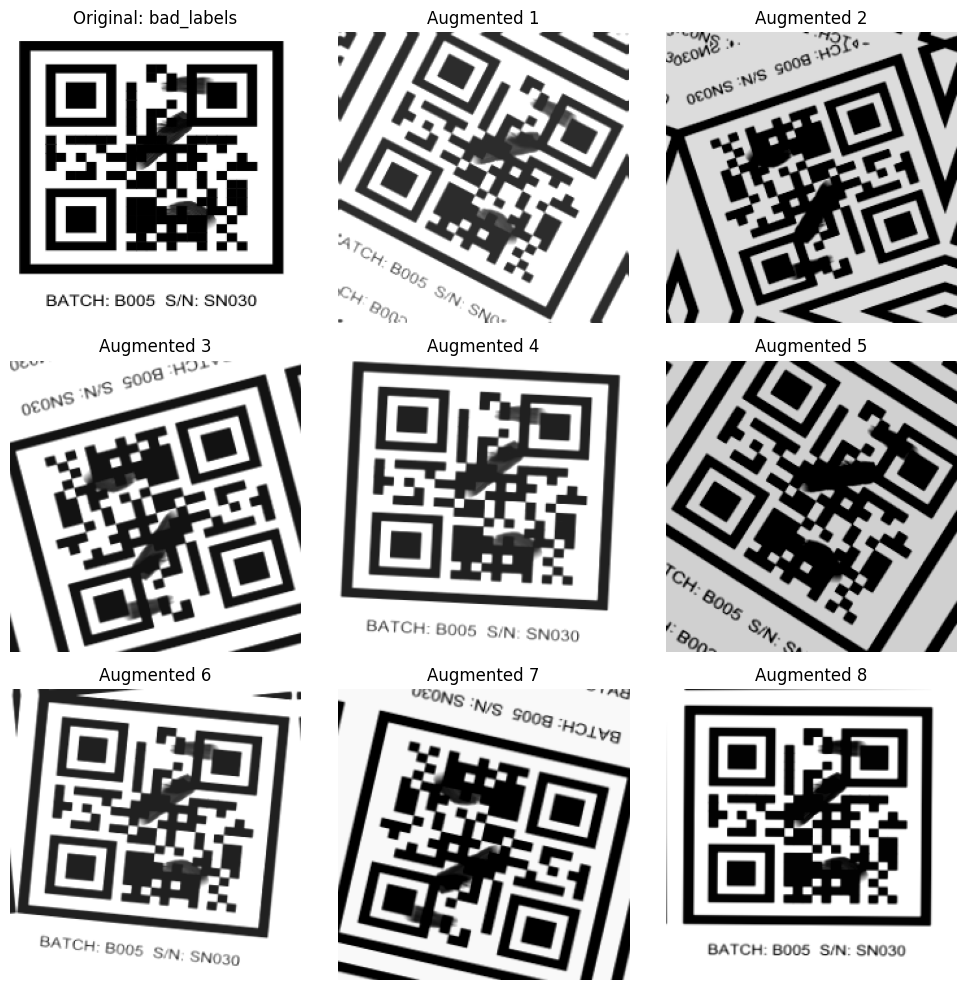

In [ ]:
import matplotlib.pyplot as plt

print("--- Visualizing a Batch of Original and Augmented Images ---")

for images, labels in train_ds.take(1):  # Get one batch
    original_image = images[0]

    plt.figure(figsize=(10, 10))
    # Display the original image
    ax = plt.subplot(3, 3, 1)
    plt.imshow(original_image.numpy().astype("uint8")) # Cast to uint8 if needed for imshow
    plt.title(f"Original: {class_names[int(labels[0].numpy().item())]}")
    plt.axis("off")

    # Display 8 augmented versions of the same image
    for i in range(8):
        ax = plt.subplot(3, 3, i + 2)
        augmented_image = data_augmentation(tf.expand_dims(original_image, 0), training=True)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))
        plt.title(f"Augmented {i+1}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()
    break

In [ ]:
import tensorflow as tf

print(f"--- Loading MobileNetV2 Base Model with IMAGE_SIZE: {IMAGE_SIZE} ---")

base_model = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    include_top=False,
    weights='imagenet'
)

print("MobileNetV2 base model loaded.")

--- Loading MobileNetV2 Base Model with IMAGE_SIZE: (224, 224) ---
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MobileNetV2 base model loaded.


In [ ]:
print("--- Freezing the Base Model (MobileNetV2) ---")
base_model.trainable = False
print(f"Base model 'trainable' attribute set to: {base_model.trainable}")
print("Trainable status of some layers in base_model:")
for layer in base_model.layers[:5]:
  print(f"{layer.name}: {layer.trainable}")

--- Freezing the Base Model (MobileNetV2) ---
Base model 'trainable' attribute set to: False
Trainable status of some layers in base_model:
input_layer_1: False
Conv1: False
bn_Conv1: False
Conv1_relu: False
expanded_conv_depthwise: False


In [ ]:
from tensorflow.keras import layers, Model, Input # Ensure Input is imported

print("--- Building the Full Model with Transfer Learning ---")

inputs = Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3), name="input_layer")
x = data_augmentation(inputs, training=None)

x = tf.keras.applications.mobilenet_v2.preprocess_input(x)
print("Applied MobileNetV2 preprocessing.")

# 4. Pass inputs through the frozen base model
# 'training=False' here ensures that even if base_model.trainable is True later
# (for fine-tuning), batch normalization layers in MobileNetV2 run in inference mode
# when using the frozen base. This is important for stable fine-tuning.
x = base_model(x, training=False)
print("Passed data through base_model.")

# 5. Add a Global Average Pooling layer
x = layers.GlobalAveragePooling2D(name="global_average_pooling")(x)
print("Applied GlobalAveragePooling2D.")

# 6. Add a Dropout layer for regularization
x = layers.Dropout(0.2, name="dropout_layer")(x) # Dropout 20% of units
print("Applied Dropout.")

# 7. Add the final classification layer
# Dense layer with 1 unit (for binary classification) and sigmoid activation
outputs = layers.Dense(1, activation='sigmoid', name="output_layer")(x)
print("Added output Dense layer with sigmoid activation.")

# Create the final model
model = Model(inputs=inputs, outputs=outputs, name="label_quality_classifier")

print("\n--- Full Model Summary ---")
model.summary()

--- Building the Full Model with Transfer Learning ---
Applied MobileNetV2 preprocessing.
Passed data through base_model.
Applied GlobalAveragePooling2D.
Applied Dropout.
Added output Dense layer with sigmoid activation.

--- Full Model Summary ---


Model: "label_quality_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ data_augmentation_v2            │ (None, 224, 224, 3)    │             0 │
│ (Sequential)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling          │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_layer (Dropout)         │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
print("--- Compiling the Model ---")


model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=['accuracy']
)

print("Model compiled successfully.")

--- Compiling the Model ---
Model compiled successfully.


In [ ]:
print("--- Starting Initial Model Training ---")
initial_epochs = 20

history = model.fit(
    train_ds,
    epochs=initial_epochs,
    validation_data=validation_ds
)

print("\n--- Initial Model Training Finished ---")

--- Starting Initial Model Training ---
Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.5182 - loss: 0.7438 - val_accuracy: 0.8000 - val_loss: 0.6193
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7050 - loss: 0.6601 - val_accuracy: 0.6000 - val_loss: 0.6177
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.5458 - loss: 0.7538 - val_accuracy: 0.5000 - val_loss: 0.6214
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.5823 - loss: 0.6762 - val_accuracy: 0.5000 - val_loss: 0.6175
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.4581 - loss: 0.6973 - val_accuracy: 0.5000 - val_loss: 0.6089
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.4517 - loss: 0.7452 - val_accuracy: 0.5000 - val_loss: 0.6025
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6625 - loss: 0.6806 - val_accuracy: 0.8000 - val_loss: 0.5939
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.6833 - loss: 0.6015 - v

--- Plotting Training and Validation Metrics ---


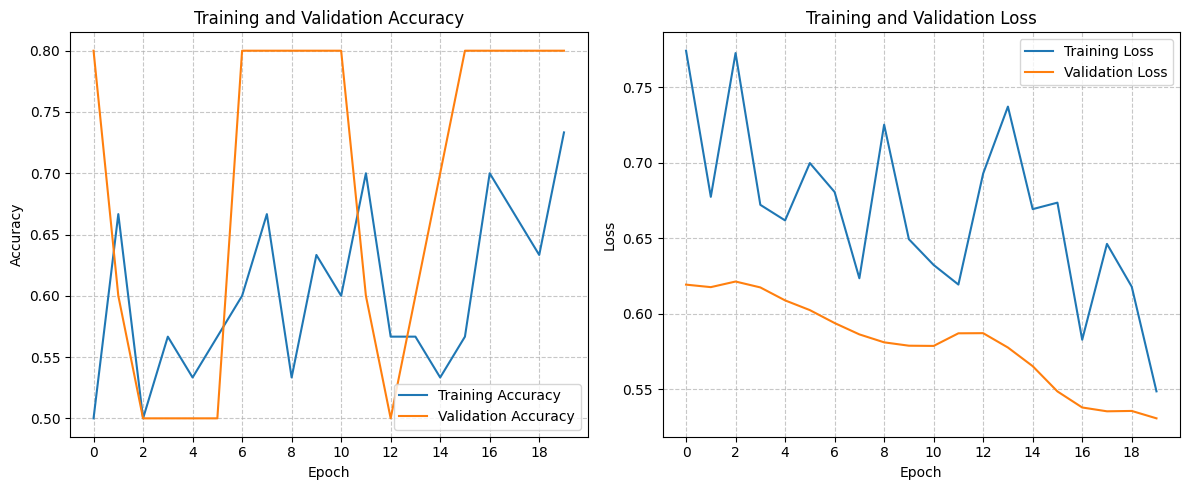


--- Interpreting the Plots ---
1. Good Fit: Training and validation loss decrease and stabilize. Training and validation accuracy increase and stabilize. Validation metrics are close to training metrics.
2. Overfitting: Gap between training and validation loss widens (training loss decreases, validation loss increases or plateaus). Gap between training and validation accuracy widens (training accuracy increases, validation accuracy plateaus or decreases).
3. Underfitting: Both training and validation loss are high and do not decrease much. Both training and validation accuracy are low and do not improve much. The model is too simple or not trained enough.


In [ ]:
import matplotlib.pyplot as plt

print("--- Plotting Training and Validation Metrics ---")

# Retrieve training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc)) # Should be equal to initial_epochs if training completed fully

plt.figure(figsize=(12, 5)) # Adjusted figure size

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
if len(epochs_range) > 10: # Add grid for better readability if many epochs
  plt.xticks(epochs_range[::max(1, len(epochs_range)//10)]) # Show ticks every few epochs
else:
  plt.xticks(epochs_range)
plt.grid(True, linestyle='--', alpha=0.7)


# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
if len(epochs_range) > 10:
  plt.xticks(epochs_range[::max(1, len(epochs_range)//10)])
else:
  plt.xticks(epochs_range)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show()

print("\n--- Interpreting the Plots ---")
print("1. Good Fit: Training and validation loss decrease and stabilize. Training and validation accuracy increase and stabilize. Validation metrics are close to training metrics.")
print("2. Overfitting: Gap between training and validation loss widens (training loss decreases, validation loss increases or plateaus). Gap between training and validation accuracy widens (training accuracy increases, validation accuracy plateaus or decreases).")
print("3. Underfitting: Both training and validation loss are high and do not decrease much. Both training and validation accuracy are low and do not improve much. The model is too simple or not trained enough.")

In [ ]:
print("--- Evaluating Model on Test Dataset ---")

test_loss, test_accuracy = model.evaluate(test_ds, verbose=1)

# Save only the weights of the model
weights_path = '/content/drive/My Drive/IntelUnnatiProject/ML_Label_Quality/saved_models/label_quality_classifier_weights.weights.h5'
model.save_weights(weights_path)
print(f"Model weights saved to: {weights_path}")

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f} ({(test_accuracy*100):.2f}%)")

--- Evaluating Model on Test Dataset ---
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 318ms/step - accuracy: 0.8250 - loss: 0.5308
Model weights saved to: /content/drive/My Drive/IntelUnnatiProject/ML_Label_Quality/saved_models/label_quality_classifier_weights.weights.h5

Test Loss: 0.5380
Test Accuracy: 0.8000 (80.00%)


In [ ]:
print("--- Saving the Trained Model (TensorFlow SavedModel format for Keras 3) ---")

# Define the path to save the model in your Google Drive
# For SavedModel, you provide a directory path. TensorFlow will create files inside it.
# model_sm_save_path = '/content/drive/My Drive/IntelUnnatiProject/ML_Label_Quality/saved_models/label_quality_classifier_initial_frozen_sm' # Directory path

# Use the recommended .keras format for saving the model with Keras 3
model_keras_save_path = '/content/drive/My Drive/IntelUnnatiProject/ML_Label_Quality/saved_models/label_quality_classifier_initial_frozen.keras' # File path with .keras extension

# Save the model
model.save(model_keras_save_path)

print(f"Model saved in native Keras format to: {model_keras_save_path}")

--- Saving the Trained Model (TensorFlow SavedModel format for Keras 3) ---
Model saved in native Keras format to: /content/drive/My Drive/IntelUnnatiProject/ML_Label_Quality/saved_models/label_quality_classifier_initial_frozen.keras
